In [4]:
# Get image data

import zipfile
import tensorflow as tf

# check tensorflow version
print(f"TensorFlow version: {tf.__version__}")

# check if GPU is available
if tf.config.list_physical_devices("GPU"):
    print("GPU is available")
    # get the GPU name and specs
    gpu = tf.config.list_physical_devices("GPU")[0]

else:
    print("GPU is not available")




TensorFlow version: 2.10.1
GPU is available


In [8]:

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

class_names


array(['pizza', 'steak'], dtype='<U5')

image shape: (512, 512, 3)


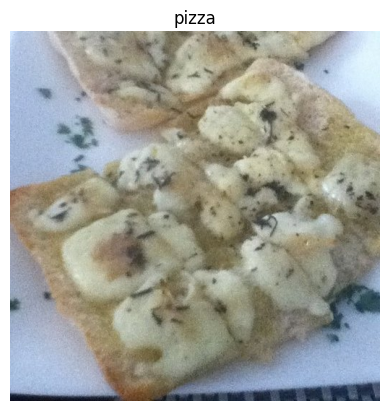

In [9]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" +  random_image[0])
  plt.imshow(img)

  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}")
  return img

img = view_random_image("pizza_steak/train", "pizza")



In [10]:


img = tf.constant(img)/255




In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42
                                               )


valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42
)


model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224,224,3)
                           ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"
                              ),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

model_1.compile(metrics=["accuracy"],
                loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam()
                )

# history_1 = model_1.fit(
#                         train_data,
#                         epochs=30,

#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data)
#                         )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
tf.random.set_seed(42)

# model_2 = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(224,224,3)),
#     tf.keras.layers.Dense(128, activation="relu"),
#     tf.keras.layers.Dense(64, activation="relu"),
#     tf.keras.layers.Dense(16, activation="relu"),
#     tf.keras.layers.Dense(4, activation="relu"),
#     tf.keras.layers.Dense(1, activation="sigmoid")

#             )

import sys
print(sys.executable)

c:\Users\great\AppData\Local\Programs\Python\Python39\python.exe


image shape: (384, 512, 3)
image shape: (512, 512, 3)


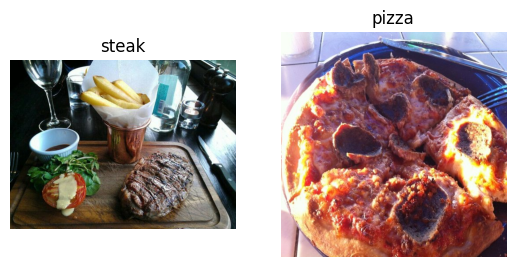

In [14]:
## binary classification on images

plt.figure()

plt.subplot(1,2,1)

steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")



In [15]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# split into batches

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)





In [16]:
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224), class_mode="binary", batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224,224), class_mode="binary", batch_size=32)




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
images, labels = train_data.next() #get the next batch of images and labels


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_4.compile(optimizer=Adam(), metrics=["accuracy", ], loss="binary_crossentropy")

history_4 = model_4.fit(train_data, epochs=15, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))




ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [21]:
import sys
print(sys.executable)

c:\Users\great\AppData\Local\Programs\Python\Python39\python.exe


<Axes: >

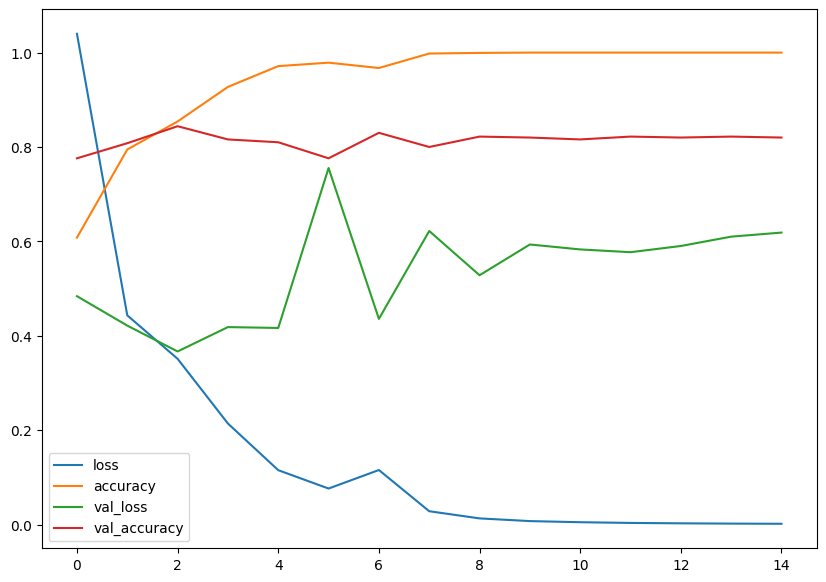

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))




In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")

  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")

  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

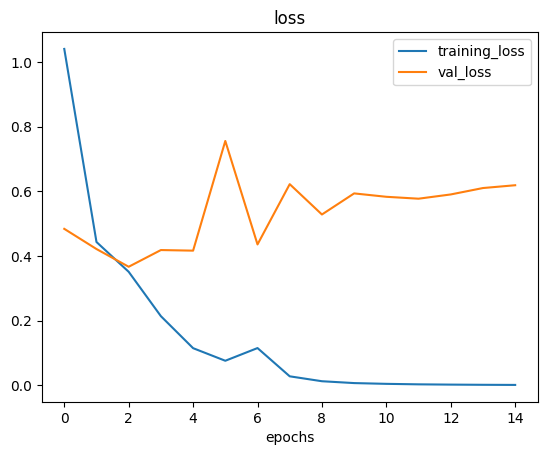

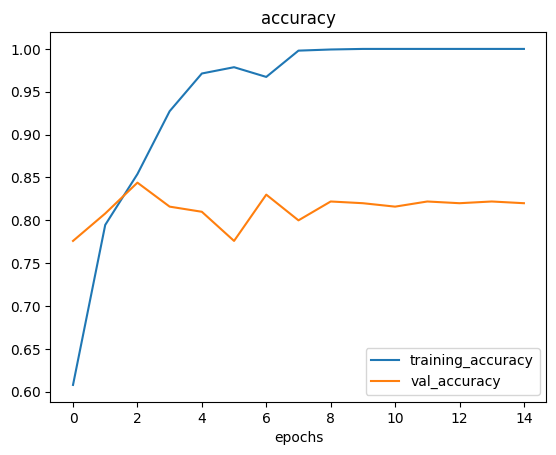

In [ ]:
plot_loss_curves(history_4)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True
                                             )

test_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True
                                             )

train_data = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), class_mode="binary", batch_size=32)

test_data = test_datagen_augmented.flow_from_directory(test_dir, target_size=(224,224), class_mode="binary", batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
### adjust the model parameters


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           padding="valid",
           input_shape = (224,224,3),
           activation="relu"
           ),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),

    Flatten(),
    Dense(1, activation="sigmoid")
])

model_5.compile(optimizer=Adam(), metrics=["accuracy"], loss="binary_crossentropy")

history_5 = model_5.fit(train_data, epochs=20, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data), callbacks=[early_stopping])



Epoch 1/20
47/47 [==============================] - 34s 691ms/step - loss: 0.7059 - accuracy: 0.6087 - val_loss: 0.5659 - val_accuracy: 0.7200
Epoch 2/20
47/47 [==============================] - 31s 655ms/step - loss: 0.5803 - accuracy: 0.7173 - val_loss: 0.4970 - val_accuracy: 0.7740
Epoch 3/20
47/47 [==============================] - 33s 709ms/step - loss: 0.5484 - accuracy: 0.7340 - val_loss: 0.5496 - val_accuracy: 0.7120
Epoch 4/20
47/47 [==============================] - 31s 652ms/step - loss: 0.5355 - accuracy: 0.7453 - val_loss: 0.4867 - val_accuracy: 0.7600
Epoch 5/20
47/47 [==============================] - 30s 650ms/step - loss: 0.4934 - accuracy: 0.7760 - val_loss: 0.4288 - val_accuracy: 0.8140
Epoch 6/20
47/47 [==============================] - 32s 672ms/step - loss: 0.4778 - accuracy: 0.7787 - val_loss: 0.5431 - val_accuracy: 0.7440
Epoch 7/20
47/47 [==============================] - 30s 649ms/step - loss: 0.4800 - accuracy: 0.7733 - val_loss: 0.4146 - val_accuracy: 0.8280